In [151]:
#Libraries to be used
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans 
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [152]:
#Code to import
dataset = pd.read_csv('C:/Users/16824/OneDrive/Desktop/Project/Data Mining/Assignment2/PA2-1/pima-indians-diabetes.csv')

In [153]:
#Selecting best attributes from dataset
X= dataset.drop('class', axis= 1)
#prepprocessing Since the enitre data is numeric only scaling pre-processing can be done to standardize the data
X = pd.DataFrame(preprocessing.scale(X), columns=['Preg','Plas','Pres','skin','test','mass','pedi','age'])
y= dataset['class']
xtrainDataSet,xtestDataSet,ytrainDataSet,ytestDataSet =  train_test_split(X,y,test_size=0.20, random_state= 2002) # dataset is divided into 20 percent test
xtrainDataSet.shape, xtestDataSet.shape,ytrainDataSet.shape,ytestDataSet.shape

((614, 8), (154, 8), (614,), (154,))

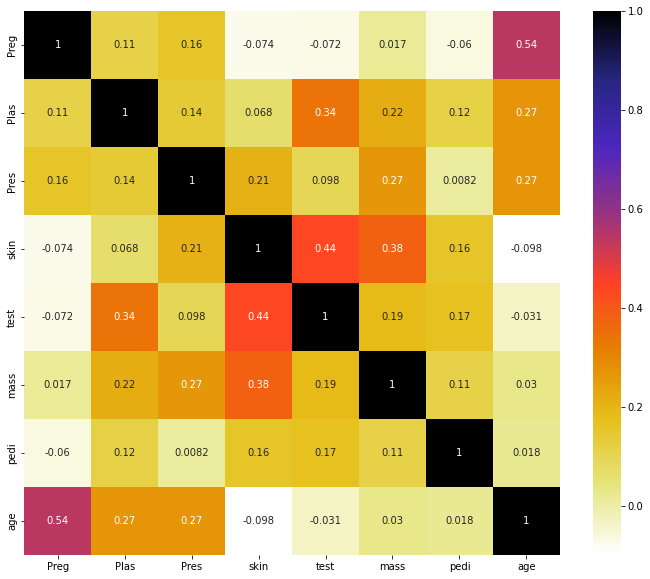

In [154]:
plt.figure(figsize=(12,10))
cor = xtrainDataSet.corr()
sns.heatmap(cor, annot= True, cmap= plt.cm.CMRmap_r)
plt.show()

In [155]:
correlation = set()
corrMatrix = xtrainDataSet.corr()
for i in range(len(corrMatrix.columns)):
    for j in range(i):
        if abs(corrMatrix.iloc[i,j]) > 0.17:
             # Checking threshold
            col = corrMatrix.columns[i] # retreaving names
            correlation.add(col) #Name of columns  
print(len(correlation),correlation)
# They are highly correlated so have to remove from test and train data set
# high related correlation are droped that gives best 3 attributes
xtrainDataSet =  xtrainDataSet.drop(correlation,axis= 1)
xtestDataSet =  xtestDataSet.drop(correlation,axis= 1)
xtrainDataSet.shape,xtestDataSet.shape


5 {'pedi', 'test', 'skin', 'age', 'mass'}


((614, 3), (154, 3))

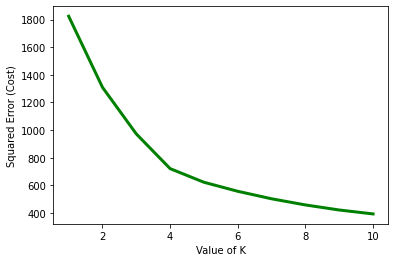

In [182]:
#Code for calculating K means
# Method 2 elbow method
# make_blobs() is used to generate sample points
# around c centers (randomly chosen)
cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(xtrainDataSet)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
 
# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot
# the best value for k is 6 according to the graph

In [157]:
#Data set is already divided test data 20 percent and train data 80
xtrainAfterValidate,xValidate,ytrainAfterValidate,yValidate=train_test_split(xtrainDataSet,ytrainDataSet, test_size= 0.25, random_state=2002)
xtrainAfterValidate.shape,xValidate.shape,ytrainAfterValidate.shape,yValidate.shape

((460, 3), (154, 3), (460,), (154,))

In [158]:
#Determining the optimal value for k classifier cross validations cross folds as 5
kValues = [i for i in range(1,50,2)]
k_scores= []

for k in kValues:
    Knn = KNeighborsClassifier(n_neighbors= k, n_jobs=-1)
    scores = cross_val_score(Knn, xtrainDataSet.to_numpy(),ytrainDataSet.to_numpy(), cv=5,scoring='accuracy') # cross validation
    k_scores.append(scores.mean()) 
optimalK = kValues[k_scores.index(max(k_scores))]
print(optimalK)

31


Text(0, 0.5, 'Error Rate')

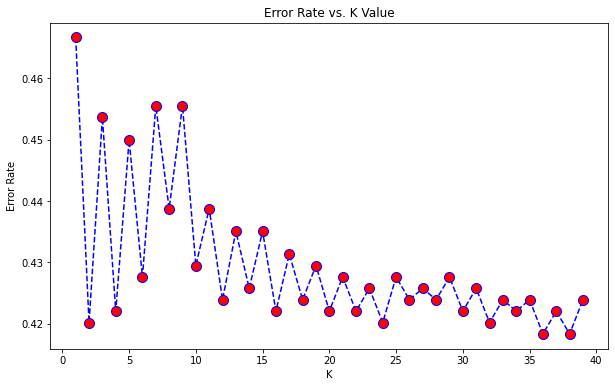

In [167]:
import numpy as np
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,metric='minkowski')
    # knn.fit(xtrainDataSet.values.ravel().reshape(1,-1),ytrainDataSet.values.ravel().reshape(1,-1))
    knn.fit(xtrainDataSet.to_numpy(),ytrainDataSet.to_numpy())
    pred_i = knn.predict(xtestDataSet.to_numpy())
    pred_i=pred_i.reshape(154,1)
    error_rate.append(np.mean(pred_i != ytestDataSet.to_numpy()))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#The optimal/best value of K is 31. The graph of the error rate stable after 31.

              precision    recall  f1-score   support

           0       0.79      0.93      0.85        99
           1       0.81      0.55      0.65        55

    accuracy                           0.79       154
   macro avg       0.80      0.74      0.75       154
weighted avg       0.80      0.79      0.78       154

Accuracy of KNN classifier on test set: 0.79


<AxesSubplot:>

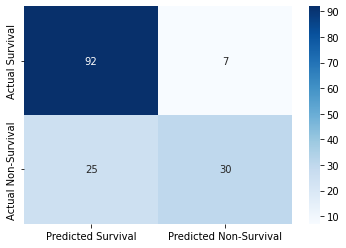

In [180]:
#Use minkowski distance for KNN.(default algorithm)
#Select only 3 attributes for training and testing your model.
#Test it with three different number for neighbors and record the results.
#For all of them print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support).
# Make predictions on validation dataset
#mentioning the k neighbors 

#from the above plot we can determine K values with leaset error rates so we will use these values to make predictions

# K = 31(optimal)

knn = KNeighborsClassifier(n_neighbors=31)
#train the model using training sets-features,labels
knn.fit(xtrainDataSet.to_numpy(), ytrainDataSet.to_numpy()) 
#predict output
predictions = knn.predict(xtestDataSet.to_numpy())
# printing the classification report for knn
print(classification_report(ytestDataSet, predictions))
#Calculating Accuracy
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(xtestDataSet.values, ytestDataSet.values)))

#Confusion matrix for KNN
df_cm = pd.DataFrame(
confusion_matrix(ytestDataSet, predictions),
columns=['Predicted Survival', 'Predicted Non-Survival'],
index=['Actual Survival', 'Actual Non-Survival'])
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

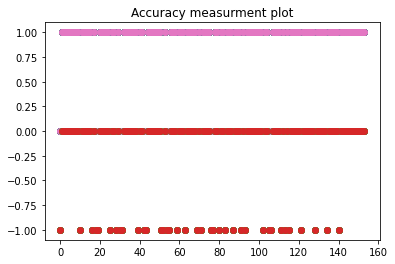

In [160]:
# Plotting the difference between the actual values and predicted values
# Plotting the classifier in a 2D Projection for K=3.
predictions=predictions.reshape(154,1)
plt.plot(ytestDataSet.to_numpy() - predictions, marker='o', linestyle='')
plt.title("Accuracy measurment plot")
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        99
           1       0.76      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154

Accuracy of KNN classifier on test set: 0.77


<AxesSubplot:>

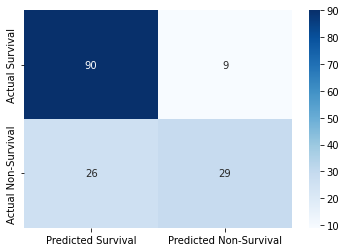

In [176]:
#Use minkowski distance for KNN.
#Select only 3 attributes for training and testing your model.
#Test it with three different number for neighbors and record the results.
#For all of them print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support).
# Make predictions on validation dataset
#mentioning the k neighbors 

#from the above plot we can determine K values with leaset error rates so we will use these values to make predictions

# K = 6

knn = KNeighborsClassifier(n_neighbors=6)
#train the model using training sets-features,labels
knn.fit(xtrainDataSet.to_numpy(), ytrainDataSet.to_numpy()) 
#predict output
predictions = knn.predict(xtestDataSet.to_numpy())
# printing the classification report for knn
print(classification_report(ytestDataSet, predictions))
#Calculating Accuracy
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(xtestDataSet.values, ytestDataSet.values)))

#Confusion matrix for KNN
df_cm = pd.DataFrame(
confusion_matrix(ytestDataSet, predictions),
columns=['Predicted Survival', 'Predicted Non-Survival'],
index=['Actual Survival', 'Actual Non-Survival'])
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

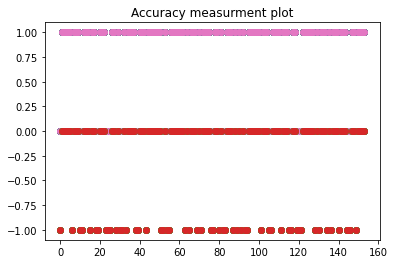

In [162]:
# Plotting the difference between the actual values and predicted values
# Plotting the classifier in a 2D Projection for K=3.
predictions=predictions.reshape(154,1)
plt.plot(ytestDataSet.to_numpy() - predictions, marker='o', linestyle='')
plt.title("Accuracy measurment plot")
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.79      0.80        99
           1       0.64      0.69      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

Accuracy of KNN classifier on test set: 0.75


<AxesSubplot:>

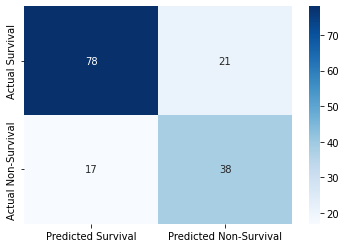

In [181]:
#Use minkowski distance for KNN.
#Select only 3 attributes for training and testing your model.
#Test it with three different number for neighbors and record the results.
#For all of them print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support).
# Make predictions on validation dataset
#mentioning the k neighbors 

#from the above plot we can determine K values with leaset error rates so we will use these values to make predictions

# K = 1

knn = KNeighborsClassifier(n_neighbors=1)
#train the model using training sets-features,labels
knn.fit(xtrainDataSet.to_numpy(), ytrainDataSet.to_numpy()) 
#predict output
predictions = knn.predict(xtestDataSet.to_numpy())
# printing the classification report for knn
print(classification_report(ytestDataSet, predictions))
#Calculating Accuracy
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn.score(xtestDataSet.values, ytestDataSet.values)))

#Confusion matrix for KNN
df_cm = pd.DataFrame(
confusion_matrix(ytestDataSet, predictions),
columns=['Predicted Survival', 'Predicted Non-Survival'],
index=['Actual Survival', 'Actual Non-Survival'])
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

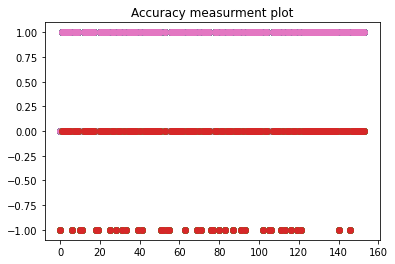

In [164]:
# Plotting the difference between the actual values and predicted values
# Plotting the classifier in a 2D Projection for K=3.
predictions=predictions.reshape(154,1)
plt.plot(ytestDataSet.to_numpy() - predictions, marker='o', linestyle='')
plt.title("Accuracy measurment plot")
plt.show()